# Comparison of MLP and Bayes NN on Breast Cancer dataset

### Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import zhusuan as zs


import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

tf.set_random_seed(123)
np.random.seed(321)

/home/glegeza/Programming/semestr2/bayesian_deep_learning/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/glegeza/Programming/semestr2/bayesian_deep_learning/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/glegeza/Programming/semestr2/bayesian_deep_learning/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 

### Load data

In [2]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y_, test_y_ = train_test_split(X, y, test_size=.2, random_state=42)

n_train, x_dim = train_X.shape
n_test = test_X.shape[0]
y_dim = 2

train_y = tf.keras.utils.to_categorical(train_y_, y_dim)
test_y = tf.keras.utils.to_categorical(test_y_, y_dim)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((455, 30), (455, 2), (114, 30), (114, 2))

## Standarize data

In [3]:
def standardize(data_train, data_test):
    """
    Standardize a dataset to have zero mean and unit standard deviation.

    :param data_train: 2-D Numpy array. Training data.
    :param data_test: 2-D Numpy array. Test data.

    :return: (train_set, test_set, mean, std), The standardized dataset and
        their mean and standard deviation before processing.
    """
    std = np.std(data_train, 0, keepdims=True)
    std[std == 0] = 1
    mean = np.mean(data_train, 0, keepdims=True)
    data_train_standardized = (data_train - mean) / std
    data_test_standardized = (data_test - mean) / std
    mean, std = np.squeeze(mean, 0), np.squeeze(std, 0)
    return data_train_standardized, data_test_standardized, mean, std

In [4]:
train_X_standard, test_X_standard, _, _ = standardize(train_X, test_X)

### Defintion of parameters

In [5]:
n_hiddens = [64, 32]
layer_sizes = [x_dim] + n_hiddens + [y_dim]

epochs = 100
lr = 0.005
batch_size = 100 

### MLP model

In [6]:
mlp = Sequential()
mlp.add(Dense(layer_sizes[1], activation="relu", input_shape=(x_dim,)))
for out_dim in layer_sizes[2:-1]:
    mlp.add(Dense(out_dim, activation="relu"))
mlp.add(Dense(y_dim, activation="softmax"))

optimizer = Adam(lr=lr)
mlp.compile(
    loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
mlp.build()
mlp.summary()

Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________


In [7]:
training_results = mlp.fit(
                            x=train_X_standard,
                            y=train_y,
                            epochs=epochs,
                            batch_size=batch_size,
                            shuffle=True,
                            validation_data=(test_X_standard, test_y),
                        )

Train on 455 samples, validate on 114 samples
Instructions for updating:
Use tf.cast instead.


2023-12-30 22:49:48.238965: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-12-30 22:49:48.262466: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1800000000 Hz
2023-12-30 22:49:48.263120: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55990a5c4c30 executing computations on platform Host. Devices:
2023-12-30 22:49:48.263151: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Epoch 1/100
455/455 [==============================] - 0s 437us/sample - loss: 0.2503 - acc: 0.9187 - val_loss: 0.0958 - val_acc: 0.9561
Epoch 2/100
455/455 [==============================] - 0s 25us/sample - loss: 0.1017 - acc: 0.9670 - val_loss: 0.0634 - val_acc: 0.9649
Epoch 3/100
455/455 [==============================] - 0s 25us/sample - loss: 0.0695 - acc: 0.9824 - val_loss: 0.0559 - val_acc: 0.9825
Epoch 4/100
455/455 [==============================] - 0s 23us/sample - loss: 0.0562 - acc: 0.9824 - val_loss: 0.0606 - val_acc: 0.9737
Epoch 5/100
455/455 [==============================] - 0s 24us/sample - loss: 0.0467 - acc: 0.9824 - val_loss: 0.0600 - val_acc: 0.9825
Epoch 6/100
455/455 [==============================] - 0s 26us/sample - loss: 0.0391 - acc: 0.9912 - val_loss: 0.0582 - val_acc: 0.9825
Epoch 7/100
455/455 [==============================] - 0s 25us/sample - loss: 0.0316 - acc: 0.9934 - val_loss: 0.0668 - val_acc: 0.9737
Epoch 8/100
455/455 [==========================

In [8]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.xlim([0, 20])
    # plt.ylim(ylim)
    # Tailor x-axis tick marks
    # ax.xaxis.set_major_locator(MultipleLocator(5))
    # ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

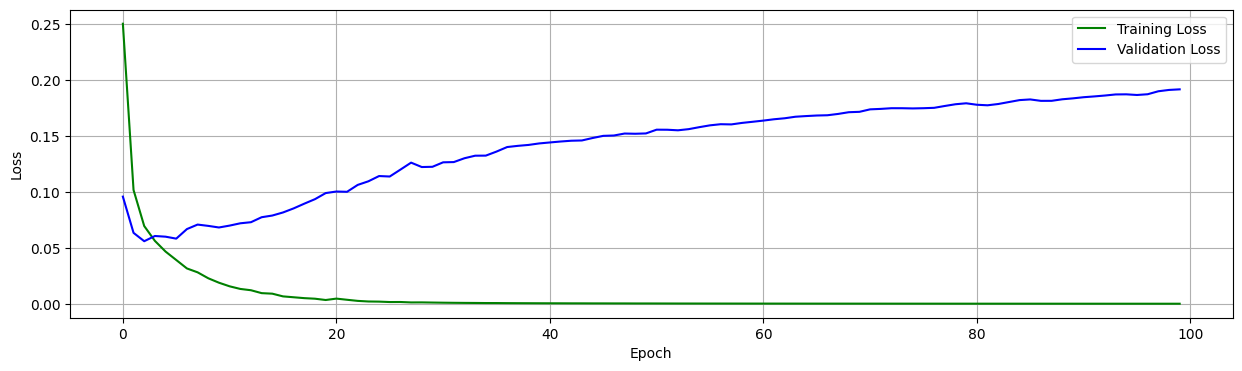

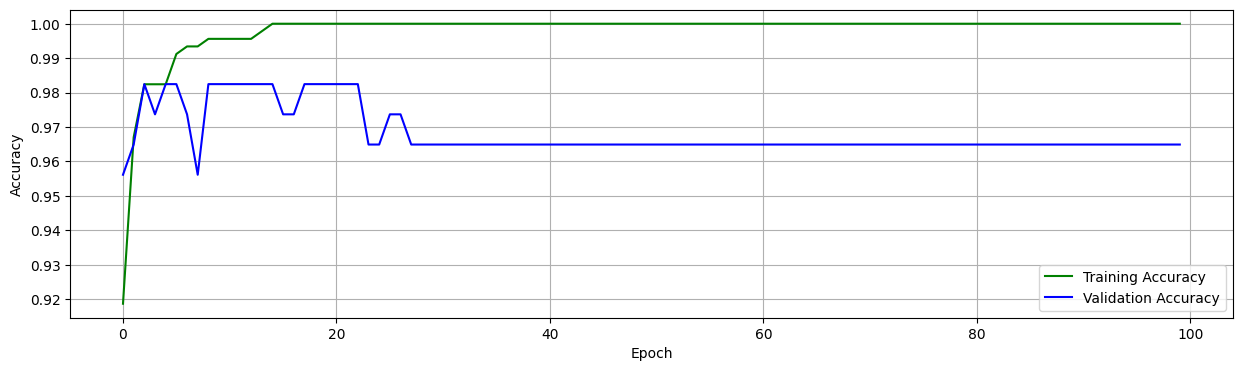

In [9]:
train_loss = training_results.history["loss"]
valid_loss = training_results.history["val_loss"]
train_acc  = training_results.history["acc"]
valid_acc  = training_results.history["val_acc"]

plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

### Bayes NN model

In [10]:
train_y = train_y_
test_y = test_y_

In [11]:
lr=0.08

In [12]:
@zs.meta_bayesian_net(scope="bnn", reuse_variables=True)
def build_bnn(x, layer_sizes, n_particles):
    bn = zs.BayesianNet()
    h = tf.tile(x[None, ...], [n_particles, 1, 1])
    for i, (n_in, n_out) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        w = bn.normal("w" + str(i), tf.zeros([n_out, n_in + 1]), std=1.,
                      group_ndims=2, n_samples=n_particles)
        h = tf.concat([h, tf.ones(tf.shape(h)[:-1])[..., None]], -1)
        h = tf.einsum("imk,ijk->ijm", w, h) / tf.sqrt(
            tf.cast(tf.shape(h)[2], tf.float32))
        if i < len(layer_sizes) - 2:
            h = tf.nn.relu(h)

    y = bn.categorical('y', h)
    bn.deterministic('y_logit', h)
    return bn

In [13]:
@zs.reuse_variables(scope="variational")
def build_mean_field_variational(layer_sizes, n_particles):
    bn = zs.BayesianNet()
    for i, (n_in, n_out) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        w_mean = tf.get_variable(
            "w_mean_" + str(i), shape=[n_out, n_in + 1],
            initializer=tf.constant_initializer(0.))
        w_logstd = tf.get_variable(
            "w_logstd_" + str(i), shape=[n_out, n_in + 1],
            initializer=tf.constant_initializer(0.))
        bn.normal("w" + str(i), w_mean, logstd=w_logstd,
                  n_samples=n_particles, group_ndims=2)
    return bn

In [14]:
n_particles = tf.placeholder(tf.int32, shape=[], name='n_particles')
x = tf.placeholder(tf.float32, shape=(None, x_dim))
y = tf.placeholder(tf.int32, shape=(None))

w_names = ["w" + str(i) for i in range(len(layer_sizes) - 1)]

x_obs = tf.tile(tf.expand_dims(x, 0), [n_particles, 1, 1])
y_obs = tf.tile(tf.expand_dims(y, 0), [n_particles, 1])

In [15]:
model = build_bnn(x, layer_sizes, n_particles)
variational = build_mean_field_variational(layer_sizes, n_particles)

def log_joint(bn):
    log_pe = bn.cond_log_prob(w_names)
    log_py_xe = bn.cond_log_prob('y')
    return tf.add_n(log_pe) + tf.reduce_mean(log_py_xe, 1) * n_train

model.log_joint = log_joint

lower_bound = zs.variational.elbo(model, {'y': y_obs},
                                    variational=variational, axis=0)

In [16]:
y_logit = lower_bound.bn["y_logit"]
h_pred = tf.reduce_mean(tf.nn.softmax(y_logit), 0)
y_pred = tf.argmax(h_pred, 1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(y_pred, y), tf.float32))

cost = tf.reduce_mean(lower_bound.sgvb()) / n_train
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
infer = optimizer.minimize(cost)

In [17]:
lower_bound = tf.reduce_mean(lower_bound) / n_train

params = tf.trainable_variables()
for i in params:
    print('variable name = {}, shape = {}'
            .format(i.name, i.get_shape()))

variable name = dense/kernel:0, shape = (30, 64)
variable name = dense/bias:0, shape = (64,)
variable name = dense_1/kernel:0, shape = (64, 32)
variable name = dense_1/bias:0, shape = (32,)
variable name = dense_2/kernel:0, shape = (32, 2)
variable name = dense_2/bias:0, shape = (2,)
variable name = Adam/iterations:0, shape = ()
variable name = Adam/lr:0, shape = ()
variable name = Adam/beta_1:0, shape = ()
variable name = Adam/beta_2:0, shape = ()
variable name = Adam/decay:0, shape = ()
variable name = training/Adam/Variable:0, shape = (30, 64)
variable name = training/Adam/Variable_1:0, shape = (64,)
variable name = training/Adam/Variable_2:0, shape = (64, 32)
variable name = training/Adam/Variable_3:0, shape = (32,)
variable name = training/Adam/Variable_4:0, shape = (32, 2)
variable name = training/Adam/Variable_5:0, shape = (2,)
variable name = training/Adam/Variable_6:0, shape = (30, 64)
variable name = training/Adam/Variable_7:0, shape = (64,)
variable name = training/Adam/Vari

In [18]:
lb_samples = 10
ll_samples = 5000
epochs = 100
batch_size = 20
iters = (n_train-1) // batch_size + 1
test_batch_size = 20
test_iters = (n_test-1) // test_batch_size + 1
test_freq = 1

In [19]:
train_accs = []
test_accs= []

train_lbs = []
test_lbs = []


# Run the inference
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1, epochs + 1):
        time_epoch = -time.time()
        indices = np.random.permutation(n_train)
        train_X_standard = train_X_standard[indices]
        train_y = train_y[indices]
        lbs = []
        correct = 0
        for t in range(iters):
            x_batch = train_X_standard[t * batch_size:(t + 1) * batch_size]
            y_batch = train_y[t * batch_size:(t + 1) * batch_size]
            _, lb = sess.run(
                [infer, lower_bound],
                feed_dict={n_particles: lb_samples,
                            x: x_batch, y: y_batch})
            lbs.append(lb)
            if epoch % test_freq == 0 or epoch == 0:
                train_acc1 = sess.run(
                    [acc],
                    feed_dict={n_particles: ll_samples,
                                x: x_batch, y: y_batch})
                correct += train_acc1[0] * len(x_batch)
        if epoch % test_freq == 0 or epoch == 0:
            train_accs.append(correct / n_train)

        time_epoch += time.time()
        train_lb = np.mean(lbs)
        train_lbs.append(train_lb)
        print('Epoch {} ({:.1f}s): Lower bound = {}'.format(
            epoch, time_epoch, train_lb))

        if epoch % test_freq == 0 or epoch == 0:
            time_test = -time.time()
            test_lbs_batch = []
            correct = 0
            for t in range(test_iters):
                x_batch = test_X_standard[t * test_batch_size:(t + 1) * test_batch_size]
                y_batch = test_y[t * test_batch_size:(t + 1) * test_batch_size]
                lb, acc1 = sess.run(
                    [lower_bound, acc],
                    feed_dict={n_particles: ll_samples,
                                x: x_batch, y: y_batch})
                test_lbs_batch.append(lb)
                correct += acc1 * len(x_batch)
            time_test += time.time()
            test_acc = correct / n_test
            test_accs.append(test_acc)
            test_lbs.append(np.mean(test_lbs_batch))
            # print('>>> TEST ({:.1f}s)'.format(time_test))
            # print('>> Test lower bound = {}'.format(np.mean(test_lbs_batch)))
            # print('>> Test accuracy = {}'.format(test_acc))


Epoch 1 (4.0s): Lower bound = -0.9928080439567566
Epoch 2 (3.6s): Lower bound = -0.7209159135818481
Epoch 3 (4.2s): Lower bound = -0.6142334938049316
Epoch 4 (4.7s): Lower bound = -0.6087641716003418
Epoch 5 (4.5s): Lower bound = -0.6104177832603455
Epoch 6 (4.5s): Lower bound = -0.5964711904525757
Epoch 7 (4.7s): Lower bound = -0.6093712449073792
Epoch 8 (4.4s): Lower bound = -0.583987295627594
Epoch 9 (4.3s): Lower bound = -0.5869691371917725
Epoch 10 (4.4s): Lower bound = -0.5852994322776794
Epoch 11 (4.3s): Lower bound = -0.5963267087936401
Epoch 12 (4.5s): Lower bound = -0.5935816168785095
Epoch 13 (4.4s): Lower bound = -0.5798990726470947
Epoch 14 (4.3s): Lower bound = -0.5835568904876709
Epoch 15 (4.3s): Lower bound = -0.5807276368141174
Epoch 16 (4.4s): Lower bound = -0.5638987421989441
Epoch 17 (4.4s): Lower bound = -0.567288875579834
Epoch 18 (4.6s): Lower bound = -0.5559474229812622
Epoch 19 (4.6s): Lower bound = -0.5700325965881348
Epoch 20 (4.4s): Lower bound = -0.58023494

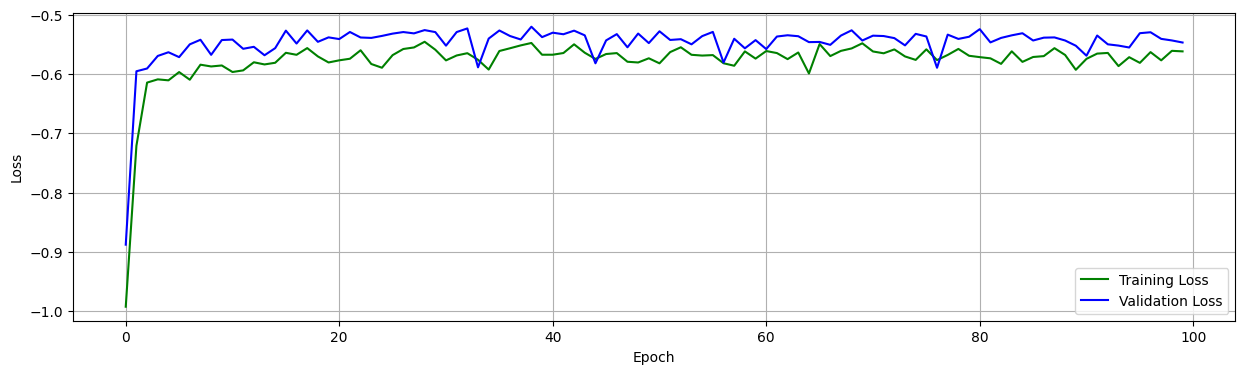

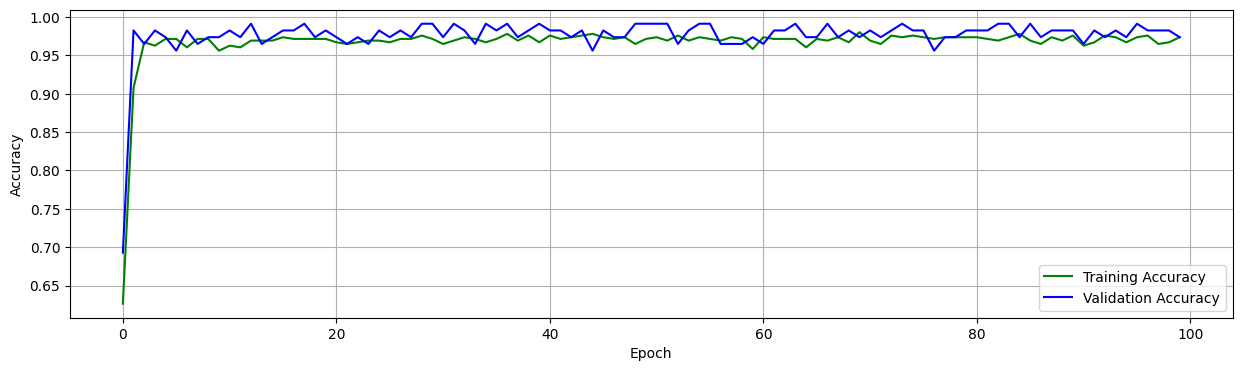

In [20]:
plot_results([ train_lbs, test_lbs ],
            ylabel="Loss",
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"])

plot_results([ train_accs, test_accs ],
            ylabel="Accuracy",
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [22]:
test_accs[:10]

[0.6929824561403509,
 0.9824561361680951,
 0.9649122723361903,
 0.9824561361680951,
 0.9736842042521426,
 0.9561403404202378,
 0.9824561361680951,
 0.9649122723361903,
 0.9736842042521426,
 0.9736842042521426]